In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("CropData.csv")
data

,District,Village,pH,EC,OC,N,P,K,S,Zn,Fe,Cu,Mn,B,Soil_type,Soil_Quality,Crop
0,Shirala,Ambewadi,6.70,0.240,0.67,262.4,30.00,224.40,10.90,0.74,5.60,1.77,5.51,0.77,Neutral,Fertile Soil,GroundNut
1,Shirala,Ambewadi,6.70,0.240,0.67,262.4,30.00,224.40,10.90,0.74,5.60,1.77,5.51,0.77,Neutral,Fertile Soil,GroundNut
2,Shirala,Ambewadi,6.70,0.240,0.67,262.4,30.00,224.40,10.90,0.74,5.60,1.77,5.51,0.77,Neutral,Fertile Soil,GroundNut
3,Shirala,Ambewadi,6.70,0.240,0.67,262.4,30.00,224.40,10.90,0.74,5.60,1.77,5.51,0.77,Neutral,Fertile Soil,GroundNut
4,Shirala,Ambewadi,6.70,0.240,0.67,262.4,30.00,224.40,10.90,0.74,5.60,1.77,5.51,0.77,Neutral,Fertile Soil,GroundNut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172075,Khamgaon,Chikhali Bk.,8.48,0.290,0.35,205.0,8.71,532.00,11.55,0.41,3.49,0.58,15.38,0.73,Slighty alkaline,Unfertile Soil,No Crop
172076,Khamgaon,Pimpri Gawli,7.17,0.150,0.42,176.0,140.00,372.00,12.00,0.93,8.25,2.90,13.56,0.99,Neutral,Unfertile Soil,No Crop
172077,Dhule,Hendrun,7.80,0.611,0.24,250.0,9.14,388.00,20.46,0.65,5.53,2.96,13.40,1.16,Neutral,Unfertile Soil,No Crop
172078,Shirala,Shirala,7.76,0.130,0.57,225.7,27.70,324.80,14.70,0.35,3.70,1.47,5.57,0.44,Neutral,Fertile Soil,No Crop


### Data Before Balancing

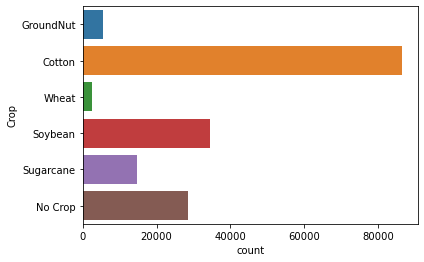

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(y='Crop',data=data)

In [4]:
from collections import Counter
counter=Counter(data['Crop'])
for k,v in counter.items():
    per = v / len(data['Crop']) * 100
    print((k, v, per))

('GroundNut', 5416, 3.1473733147373313)
('Cotton', 86306, 50.15457926545792)
('Wheat', 2606, 1.51441190144119)
('Soybean', 34398, 19.989539748953973)
('Sugarcane', 14722, 8.55532310553231)
('No Crop', 28632, 16.638772663877266)


### Balancing of data to avoid over-fitting of model

In [5]:
df1=data.copy() 
s=df1[df1.Crop == 'Sugarcane' ] 
s=s.sample(frac=0.18,random_state=2021)
c=df1[df1.Crop == 'Cotton' ] 
c=c.sample(frac=0.033,random_state=2021)
g=df1[df1.Crop == 'GroundNut' ] 
g=g.sample(frac=0.49,random_state=2021)
so=df1[df1.Crop == 'Soybean' ] 
so=so.sample(frac=0.077,random_state=2021)
n=df1[df1.Crop == 'No Crop' ] 
n=n.sample(frac=0.095,random_state=2021)
w=df1[df1.Crop == 'Wheat' ]
c.shape,s.shape,so.shape,g.shape,n.shape,w.shape

((2848, 17), (2650, 17), (2649, 17), (2654, 17), (2720, 17), (2606, 17))

In [6]:
df=pd.concat([c,s,so,g,w,n])
df.shape

(16127, 17)

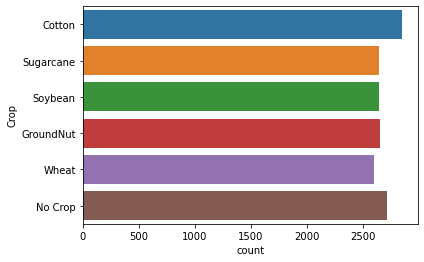

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(y='Crop',data=df)

In [8]:
#a=df.iloc[:,2:14]
x=df.iloc[:,2:14]
#x=df.iloc[:,:14]
#x=x.drop(['Village'],axis=1)
#x=pd.get_dummies(x)
x

,pH,EC,OC,N,P,K,S,Zn,Fe,Cu,Mn,B
127504,7.120,0.230,0.560,351.0000,57.0000,384.00000,4.95000,0.490,4.13,3.490,5.336,0.8300
61142,7.510,0.390,1.620,161.5000,30.5600,196.00000,6.86500,0.682,1.04,1.726,0.752,0.1980
71875,7.500,0.110,0.640,223.5000,36.0100,197.20000,6.00000,0.850,9.96,1.140,0.990,0.9100
137474,7.340,0.200,0.855,103.4800,125.0000,197.50000,1.55000,0.070,0.88,0.570,0.360,0.4380
137282,7.710,0.440,0.420,206.9700,21.2700,247.14000,2.42000,0.560,4.76,0.940,4.760,0.4400
...,...,...,...,...,...,...,...,...,...,...,...,...
148244,7.410,0.280,0.255,158.0544,101.6064,432.54400,14.66438,0.630,4.89,0.780,12.110,1.0098
157283,8.200,0.580,0.300,181.8800,32.4100,32.41952,9.40000,0.530,4.20,0.460,2.700,0.5000
166170,7.382,0.131,0.330,147.8400,8.2000,421.10000,17.60000,0.284,3.85,0.322,1.270,0.9740
164515,7.220,0.190,1.700,112.8000,55.1000,265.40000,18.20000,0.620,6.10,1.710,9.220,0.4500


#### Encode target and categorical labels with value between 0 and n_classes-1.

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
b=le.fit_transform(df.iloc[:,0])
b=pd.DataFrame(data=b,columns=['District'],index=df.index)
#b

x= pd.concat([b,a], axis=1)
x

In [9]:
y=df.iloc[:,16]
y

127504     Cotton
61142      Cotton
71875      Cotton
137474     Cotton
137282     Cotton
           ...   
148244    No Crop
157283    No Crop
166170    No Crop
164515    No Crop
151465    No Crop
Name: Crop, Length: 16127, dtype: object

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y=le.fit_transform(y)
y

array([0, 0, 0, ..., 2, 2, 2])

#### Spliting of data into train-test datasets

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size = 0.3,random_state=2021,stratify=y)

In [12]:
X_train.shape, X_test.shape , y_train.shape , y_test.shape

((11288, 12), (4839, 12), (11288,), (4839,))

##### Randomized SearchCV VS Grid SearchCV
With small data sets and lots of resources, Grid Search will produce accurate results. However, with large data sets, the high dimensions will greatly slow down computation time and be very costly. In this instance, it is advised to use Randomized Search since the number of iterations is explicitly defined by the data scientist.

# KNN Classifier 

Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf=KNeighborsClassifier()

knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
result=confusion_matrix(y_test,ypred)
print("confusion matrix\n",result)
result1=classification_report(y_test,ypred)
print("Classification report\n",result1)
result2=accuracy_score(y_test,ypred)
print("Accuracy_score\n",result2)

confusion matrix
 [[441 116  72  99  89  38]
 [ 30 670   5  23  44  24]
 [139  36 498 105  16  22]
 [169  94 118 335  43  36]
 [129 132  18  70 390  56]
 [ 27  21  23  28  23 660]]
Classification report
               precision    recall  f1-score   support

           0       0.47      0.52      0.49       855
           1       0.63      0.84      0.72       796
           2       0.68      0.61      0.64       816
           3       0.51      0.42      0.46       795
           4       0.64      0.49      0.56       795
           5       0.79      0.84      0.82       782

    accuracy                           0.62      4839
   macro avg       0.62      0.62      0.61      4839
weighted avg       0.62      0.62      0.61      4839

Accuracy_score
 0.6187228766274023


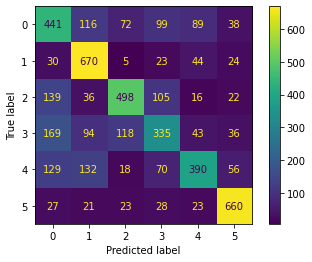

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(result).plot()

In [16]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {'n_neighbors': np.arange(1,10)}
print(parameters)

from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, random_state=2021,shuffle=True)

knn = KNeighborsClassifier()

# Tuned according to accuracy score
cv = RandomizedSearchCV(knn, param_distributions=parameters,cv=kfold,scoring='accuracy')
cv.fit( x , y )

#print(cv.cv_results_)

print(cv.best_params_)

print(cv.best_score_)


{'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}
{'n_neighbors': 1}
0.7334905635894404


#### Analysis:
Above KNN-model without tuning perdict 61.8% accuracy on test data whereas the model with K-nearest neighbor{'n_neighbors': 1} as tuning parameter perdict 73% of accuracy. 

# Decision Tree

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [17]:
from sklearn.tree import DecisionTreeClassifier
depth_range = [3,4,5,8,10,15,20]
minsplit_range = [5,10,20,25,30,40]
minleaf_range = [5,10]

parameters = dict(max_depth=depth_range,
                  min_samples_split=minsplit_range, 
                  min_samples_leaf=minleaf_range)

In [18]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, random_state=2021,shuffle=True)

from sklearn.model_selection import RandomizedSearchCV
dtclf = DecisionTreeClassifier(random_state=2021)
cv = RandomizedSearchCV(dtclf,cv=kfold,param_distributions=parameters,scoring='accuracy')

cv.fit(x,y)
# Best Parameters
print(cv.best_params_)
print(cv.best_score_)

{'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 15}
0.8240209153342273


In [19]:
dtclf.fit(X_train,y_train)
preds=dtclf.predict(X_test)
#preds=cv.predict(X_test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
result=confusion_matrix(y_test,preds)
print("Confusion matrix\n",result)
result1=classification_report(y_test,preds)
print("Classification report\n",result1)
result2=accuracy_score(y_test,preds)
print("Accuracy_score\n",result2)

Confusion matrix
 [[671  19  43  62  48  12]
 [  3 781   1   7   4   0]
 [ 52   6 630  90  20  18]
 [ 59  20  67 611  20  18]
 [ 25  27  13  12 715   3]
 [  2   0   3  11   2 764]]
Classification report
               precision    recall  f1-score   support

           0       0.83      0.78      0.81       855
           1       0.92      0.98      0.95       796
           2       0.83      0.77      0.80       816
           3       0.77      0.77      0.77       795
           4       0.88      0.90      0.89       795
           5       0.94      0.98      0.96       782

    accuracy                           0.86      4839
   macro avg       0.86      0.86      0.86      4839
weighted avg       0.86      0.86      0.86      4839

Accuracy_score
 0.8621616036371151


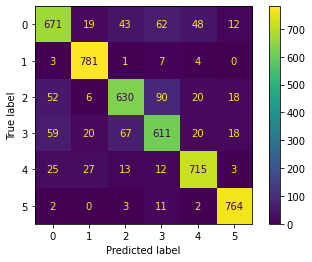

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(result).plot()

#### Analysis:
Above Decision Trees model without tuning perdict 86% accuracy on test data whereas the model with {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 15} as tuning parameter perdict 82% of accuracy.

# Random Forest 

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [22]:
from sklearn.ensemble import RandomForestClassifier
rm=RandomForestClassifier(random_state=2021)
rm.fit(X_train,y_train)
predx=rm.predict(X_test)

In [23]:
result=confusion_matrix(y_test,predx)
print("confusion matrix\n",result)
result1=classification_report(y_test,predx)
print("Classification report\n",result1)
result2=accuracy_score(y_test,predx)
print("Accuracy_score\n",result2)

confusion matrix
 [[754   5  15  46  27   8]
 [  3 790   0   1   2   0]
 [ 37   8 683  62  24   2]
 [ 32  11  43 696   7   6]
 [ 19  14   0   8 753   1]
 [  1   0   4   5   2 770]]
Classification report
               precision    recall  f1-score   support

           0       0.89      0.88      0.89       855
           1       0.95      0.99      0.97       796
           2       0.92      0.84      0.88       816
           3       0.85      0.88      0.86       795
           4       0.92      0.95      0.94       795
           5       0.98      0.98      0.98       782

    accuracy                           0.92      4839
   macro avg       0.92      0.92      0.92      4839
weighted avg       0.92      0.92      0.92      4839

Accuracy_score
 0.9187848729076256


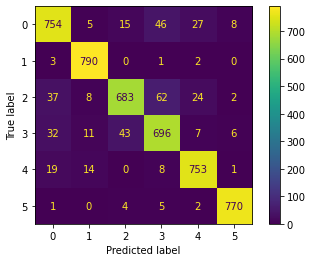

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(result).plot()

In [25]:
import numpy as np
parameters = {'max_features': np.arange(1,11)}
print(parameters)

from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, random_state=2021,shuffle=True)

model_rf = RandomForestClassifier(random_state=2021)
from sklearn.model_selection import RandomizedSearchCV
cv = RandomizedSearchCV(model_rf,cv=kfold,param_distributions=parameters,scoring='accuracy')

cv.fit( x , y )

print(cv.best_params_)

print(cv.best_score_)

print(cv.best_estimator_)


{'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])}
{'max_features': 2}
0.9226137631742096
RandomForestClassifier(max_features=2, random_state=2021)


#### Analysis:
Above Random Forest model without tuning perdict 91.8% accuracy on test data whereas the model with (max_features=2, random_state=2021) as tuning parameter perdict 92% of accuracy.

# SVM

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

SVM implement the “one-versus-one” approach for multi-class classification. In total, n_classes * (n_classes - 1) / 2 classifiers are constructed and each one trains data from two classes.To provide a consistent interface with other classifiers, the decision_function_shape option allows to monotonically transform the results of the “one-versus-one” classifiers to a “one-vs-rest” decision function of shape (n_samples, n_classes).


## SVC-OVO

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

C_range = np.linspace(1,10,5)
gamma_range = np.linspace(0.1,10,5)

param_grid = dict(gamma=gamma_range,C=C_range)

In [27]:
param_grid 

{'gamma': array([ 0.1  ,  2.575,  5.05 ,  7.525, 10.   ]),
 'C': array([ 1.  ,  3.25,  5.5 ,  7.75, 10.  ])}

In [28]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, random_state=2021,shuffle=True)
svc=SVC(probability=True,kernel='rbf',decision_function_shape='ovo')
svmGrid =RandomizedSearchCV(svc,param_distributions=param_grid, cv=kfold,verbose=3,n_iter=2)

svmGrid.fit(x,y)
print(svmGrid.best_params_)
print(svmGrid.best_score_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] gamma=10.0, C=3.25 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................. gamma=10.0, C=3.25, score=0.639, total= 2.2min
[CV] gamma=10.0, C=3.25 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min remaining:    0.0s


[CV] .................. gamma=10.0, C=3.25, score=0.622, total= 1.9min
[CV] gamma=10.0, C=3.25 ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.1min remaining:    0.0s


[CV] .................. gamma=10.0, C=3.25, score=0.621, total= 2.0min
[CV] gamma=10.0, C=3.25 ..............................................
[CV] .................. gamma=10.0, C=3.25, score=0.629, total= 2.1min
[CV] gamma=10.0, C=3.25 ..............................................
[CV] .................. gamma=10.0, C=3.25, score=0.621, total= 2.2min
[CV] gamma=7.525, C=3.25 .............................................
[CV] ................. gamma=7.525, C=3.25, score=0.639, total= 2.3min
[CV] gamma=7.525, C=3.25 .............................................
[CV] ................. gamma=7.525, C=3.25, score=0.622, total= 2.4min
[CV] gamma=7.525, C=3.25 .............................................
[CV] ................. gamma=7.525, C=3.25, score=0.620, total= 2.4min
[CV] gamma=7.525, C=3.25 .............................................
[CV] ................. gamma=7.525, C=3.25, score=0.629, total= 2.3min
[CV] gamma=7.525, C=3.25 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 22.1min finished


{'gamma': 10.0, 'C': 3.25}
0.6267124766312471


In [29]:
svc.fit(X_train,y_train)
pred=svc.predict(X_test)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

result=confusion_matrix(y_test,pred)
print("confusion matrix\n",result)
result1=classification_report(y_test,pred)
print("Classification report\n",result1)
result2=accuracy_score(y_test,pred)
print("Accuracy_score\n",result2)

confusion matrix
 [[216 183 208 119  80  49]
 [ 62 410  37  82  45 160]
 [ 63  73 572  76  19  13]
 [ 92 142 170 272  79  40]
 [111 176  70 110 218 110]
 [ 57  37 126  46  48 468]]
Classification report
               precision    recall  f1-score   support

           0       0.36      0.25      0.30       855
           1       0.40      0.52      0.45       796
           2       0.48      0.70      0.57       816
           3       0.39      0.34      0.36       795
           4       0.45      0.27      0.34       795
           5       0.56      0.60      0.58       782

    accuracy                           0.45      4839
   macro avg       0.44      0.45      0.43      4839
weighted avg       0.44      0.45      0.43      4839

Accuracy_score
 0.4455466005373011


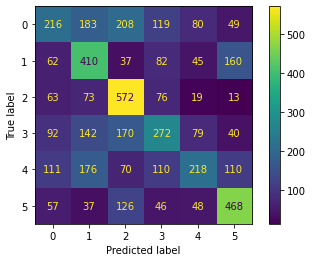

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(result).plot()

#### Analysis:
Above Support Vector Classifier(OVO) model without tuning perdict 44% accuracy on test data whereas the model with {'gamma': 10, 'C': 3.25} as tuning parameter perdict 62% of accuracy.

## SVM OVR

In [32]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=2, random_state=2020,shuffle=True)
svc=SVC(probability=True,kernel='rbf',decision_function_shape='ovr')                       
svmGrid =RandomizedSearchCV(svc,param_distributions=param_grid, cv=kfold,verbose=True,n_iter=2)
svmGrid.fit(x, y)
# Best Parameters
print(svmGrid.best_params_)
print(svmGrid.best_score_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  3.7min finished


{'gamma': 0.1, 'C': 7.75}
0.5692935140357975


In [33]:
svc.fit(X_train,y_train)
prede=svc.predict(X_test)

In [34]:
result=confusion_matrix(y_test,prede)
print("confusion matrix\n",result)
result1=classification_report(y_test,prede)
print("Classification report\n",result1)
result2=accuracy_score(y_test,prede)
print("Accuracy_score\n",result2)

confusion matrix
 [[216 183 208 119  80  49]
 [ 62 410  37  82  45 160]
 [ 63  73 572  76  19  13]
 [ 92 142 170 272  79  40]
 [111 176  70 110 218 110]
 [ 57  37 126  46  48 468]]
Classification report
               precision    recall  f1-score   support

           0       0.36      0.25      0.30       855
           1       0.40      0.52      0.45       796
           2       0.48      0.70      0.57       816
           3       0.39      0.34      0.36       795
           4       0.45      0.27      0.34       795
           5       0.56      0.60      0.58       782

    accuracy                           0.45      4839
   macro avg       0.44      0.45      0.43      4839
weighted avg       0.44      0.45      0.43      4839

Accuracy_score
 0.4455466005373011


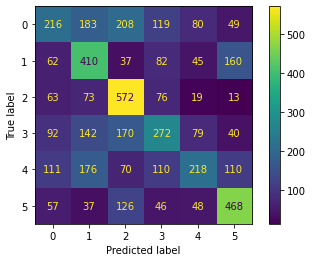

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(result).plot()

#### Analysis:
Above Support Vector Classifier(OVR) model without tuning perdict 44% accuracy on test data whereas the model with {'gamma': 0.1, 'C': 7.75} as tuning parameter perdict 56% of accuracy.

# Extreme Gradient Boosting

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

In [36]:
# Import the necessary modules
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

xgclf = XGBClassifier(random_state=2021)
xgclf.fit(X_train,y_train)

y_pred = xgclf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy:',accuracy_score(y_test,y_pred))

[00:45:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[777   2  10  37  25   4]
 [  1 794   0   0   1   0]
 [ 15   8 709  71   9   4]
 [ 24   4  32 723   7   5]
 [ 12   8   1   8 764   2]
 [  0   0   2   3   1 776]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       855
           1       0.97      1.00      0.99       796
           2       0.94      0.87      0.90       816
           3       0.86      0.91      0.88       795
           4       0.95      0.96      0.95       795
           5       0.98      0.99      0.99       782

    accuracy                           0.94      4839
   macro avg       0.94      0.94      0.94      4839
weighted avg       0.94      0.94     

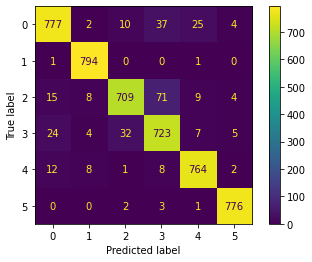

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [38]:
##################Tunning using Randomized Search CV ############

lr_range = [0.1,0.2,0.5,0.6,1]
n_est_range = [70,100,150,180]
depth_range = [3,4,5,6,7,8,9]

parameters = dict(learning_rate=lr_range,
                  n_estimators=n_est_range,
                  max_depth=depth_range)


from sklearn.model_selection import RandomizedSearchCV
clf = XGBClassifier(random_state=2021)
rcv = RandomizedSearchCV(clf, param_distributions=parameters,
                  cv=kfold,scoring='accuracy',n_iter=5,random_state=2021)

rcv.fit(x,y)
#df_rcv = pd.DataFrame(rcv.cv_results_)
print(rcv.best_params_)

print(rcv.best_score_)

[00:45:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:45:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:45:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:45:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

#### Analysis:
Above XGBoost model without tuning predict 93.8% and with tuning parameter as {'n_estimators': 150, 'max_depth': 6, 'learning_rate': 0.6} predict 91% of accuracy on dataset.


# Voting Classifier 

The idea behind the VotingClassifier is to combine conceptually different machine learning classifiers and use a majority vote or the average predicted probabilities (soft vote) to predict the class labels. Such a classifier can be useful for a set of equally well performing model in order to balance out their individual weaknesses.

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

rm=RandomForestClassifier(random_state=2021)
knn=KNeighborsClassifier()
clf = DecisionTreeClassifier(random_state=2021)
svc_ovo=SVC(probability=True,kernel='rbf',decision_function_shape='ovo')
svc_ovr=SVC(probability=True,kernel='rbf',decision_function_shape='ovr')
xgclf = XGBClassifier(random_state=2021)

Voting = VotingClassifier(estimators=[('KNN',knn),('RFC',rm),('DTC',clf),('SVC_OVO',svc_ovo),('SVC_OVR',svc_ovr),
                                      ('XG',xgclf)])


In [40]:
Voting.fit(X_train,y_train)

y_pred = Voting.predict(X_test)

print('Confusion Matrix\n',confusion_matrix(y_test, y_pred))
print('Classification Report\n',classification_report(y_test, y_pred))
print("Accuray=", accuracy_score(y_test,y_pred))

[00:48:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Matrix
 [[733  17  28  41  27   9]
 [  1 793   0   1   1   0]
 [ 51  24 679  46  13   3]
 [ 70  49  98 560  13   5]
 [ 53  68  15  37 621   1]
 [ 13   3  22   8   2 734]]
Classification Report
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       855
           1       0.83      1.00      0.91       796
           2       0.81      0.83      0.82       816
           3       0.81      0.70      0.75       795
           4       0.92      0.78      0.84       795
           5       0.98      0.94      0.96       782

    accuracy                           0.85      4839
   macro avg       0.86      0.85      0.85      48

In [41]:
for cls in (knn,rm,clf,svc_ovo,svc_ovr,xgclf,Voting):
    cls.fit(X_train,y_train)
    y_pred = cls.predict(X_test)
    print(cls.__class__.__name__,accuracy_score(y_test,y_pred))

KNeighborsClassifier 0.6187228766274023
RandomForestClassifier 0.9187848729076256
DecisionTreeClassifier 0.8621616036371151
SVC 0.4455466005373011
SVC 0.4455466005373011
[00:51:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier 0.9388303368464559
[00:53:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
VotingClassifier 0.8514155817317628


#### Analysis:
Above Voting Classifier model perdict 85% of accuracy on dataset.
